In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
columns = [
    "dest_address", "src_address", "dest_port", "src_port", "protocol", 
    "timestamp", "unknown2", "unknown3", "unknown4", 
    "number_of_packets", "tcp_flag", "unknown5", "unknown6", 
    "unknown7", "unknown8", "direction"
]
data = pd.read_csv('trace2.txt', sep=' ', names=columns)
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4007957 rows and 16 columns


In [12]:
data.describe()

,dest_port,src_port,protocol,timestamp,unknown2,unknown3,unknown4,number_of_packets,tcp_flag,unknown5,unknown6,unknown7,unknown8
count,4.007957e+06,4.007957e+06,4.007957e+06,4.007957e+06,4.007957e+06,4.007957e+06,4.007957e+06,4.007957e+06,4.007957e+06,4.007957e+06,4.007957e+06,4.007957e+06,4.007957e+06
mean,1.277789e+04,1.334749e+04,9.373783e+00,1.194602e+09,4.988444e+05,1.194602e+09,4.995531e+05,1.663463e+01,2.870086e-01,1.514268e-01,2.363019e-01,5.143019e-02,1.191060e+04
std,1.797914e+04,1.727125e+04,5.440356e+00,1.980028e+03,2.893221e+05,1.979923e+03,2.909855e+05,2.991883e+02,5.992416e-01,3.734253e-01,4.528239e-01,3.661625e-01,3.850679e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.194599e+09,0.000000e+00,1.194599e+09,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01
25%,1.863000e+03,1.770000e+03,6.000000e+00,1.194601e+09,2.480300e+05,1.194601e+09,2.461830e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.600000e+01
50%,4.672000e+03,4.672000e+03,6.000000e+00,1.194602e+09,4.987190e+05,1.194602e+09,4.995370e+05,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.440000e+02
75%,1.466200e+04,1.801900e+04,1.700000e+01,1.194604e+09,7.497670e+05,1.194604e+09,7.530300e+05,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+02
max,6.553500e+04,6.553500e+04,2.530000e+02,1.194606e+09,9.999990e+05,1.194606e+09,9.999990e+05,2.387670e+05,1.200000e+01,1.000000e+01,1.800000e+01,8.700000e+01,3.542522e+08


In [14]:
# find the dtypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007957 entries, 0 to 4007956
Data columns (total 16 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   dest_address       object
 1   src_address        object
 2   dest_port          int64 
 3   src_port           int64 
 4   protocol           int64 
 5   timestamp          int64 
 6   unknown2           int64 
 7   unknown3           int64 
 8   unknown4           int64 
 9   number_of_packets  int64 
 10  tcp_flag           int64 
 11  unknown5           int64 
 12  unknown6           int64 
 13  unknown7           int64 
 14  unknown8           int64 
 15  direction          object
dtypes: int64(13), object(3)
memory usage: 489.3+ MB


In [16]:
# check  for null values in the features  
data.isnull().sum()

dest_address         0
src_address          0
dest_port            0
src_port             0
protocol             0
timestamp            0
unknown2             0
unknown3             0
unknown4             0
number_of_packets    0
tcp_flag             0
unknown5             0
unknown6             0
unknown7             0
unknown8             0
direction            0
dtype: int64

In [9]:
# Convert 'Start Timestamp' to datetime 
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
# extract the important features and convert Src IP and Dst IP from objects to strings 
data = data[['dest_address', 'src_address','dest_port','timestamp', 'number_of_packets', 'tcp_flag']]
data.head(5)

,dest_address,src_address,dest_port,timestamp,number_of_packets,tcp_flag
0,192.108.117.148,193.55.112.40,42309,2007-11-09 08:59:44,352,0
1,193.55.112.40,192.108.117.148,14662,2007-11-09 08:59:44,615,0
2,150.217.122.27,12.165.217.192,12435,2007-11-09 08:59:44,1020,0
3,23.171.59.168,150.217.122.77,2179,2007-11-09 08:59:44,3298,0
4,150.217.70.134,194.72.25.14,53,2007-11-09 08:59:44,12,0


In [5]:
# Data normalization
features_to_scale = ['dest_port', 'number_of_packets', 'tcp_flag']
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[['dest_port', 'number_of_packets', 'tcp_flag']])

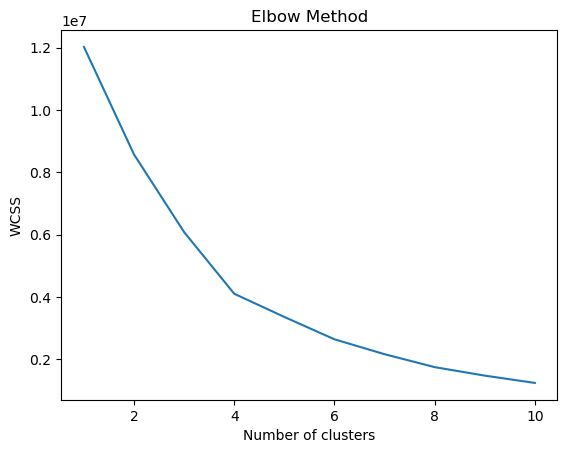

In [6]:
# Implementing KMeans Clustering
# Choosing K using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data[features_to_scale])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()